In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datetime import datetime, date
from datasets import load_dataset

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')

df.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,Jun
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",Oct
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",Jul
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",Aug


In [3]:
df_exploded = df.explode('job_skills').copy()

df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,Jun
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",Mar
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",Mar
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",Mar
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}",Mar


In [4]:
df_exploded['month_no'] = pd.to_datetime(df_exploded['job_posted_date']).dt.month

df_exploded.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month,month_no
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,Jun,6
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan,1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan,1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan,1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan,1


In [5]:
df_skill_count = df_exploded.groupby(['job_posted_month', 'job_title_short', 'job_skills', 'month_no']).size().reset_index(name= 'skill_count')

df_skill_count

,job_posted_month,job_title_short,job_skills,month_no,skill_count
0,Apr,Business Analyst,airflow,4,24
1,Apr,Business Analyst,airtable,4,2
2,Apr,Business Analyst,alteryx,4,114
3,Apr,Business Analyst,angular,4,4
4,Apr,Business Analyst,ansible,4,5
...,...,...,...,...,...
22138,Sep,Software Engineer,workfront,9,1
22139,Sep,Software Engineer,wrike,9,1
22140,Sep,Software Engineer,xamarin,9,6
22141,Sep,Software Engineer,yarn,9,10


In [6]:
df_skill_count.sort_values('month_no', inplace= True)

df_skill_count.set_index('job_posted_month', inplace= True)

df_skill_count

,job_title_short,job_skills,month_no,skill_count
job_posted_month,,,,
Jan,Software Engineer,terraform,1,344
Jan,Software Engineer,terminal,1,13
Jan,Software Engineer,tensorflow,1,69
Jan,Software Engineer,tableau,1,178
Jan,Software Engineer,zoom,1,33
...,...,...,...,...
Dec,Software Engineer,workfront,12,1
Dec,Software Engineer,wsl,12,3
Dec,Software Engineer,xamarin,12,2


In [7]:
job_title = 'Data Analyst'
job_skills = ['sql', 'excel', 'python', 'tableau', 'power bi']

In [10]:
df_skill_grouped = df_skill_count[(df_skill_count['job_title_short'] == job_title) & (df_skill_count['job_skills'].isin(job_skills))]

df_grouped_pivot = df_skill_grouped.pivot_table(index= 'job_posted_month', values= 'skill_count', columns= 'job_skills', aggfunc= 'sum').reset_index()

df_grouped_pivot['job_month_no'] = pd.to_datetime(df_grouped_pivot['job_posted_month'], format= '%b').dt.month

df_grouped_pivot = df_grouped_pivot.sort_values('job_month_no')

df_grouped_pivot = df_grouped_pivot.set_index('job_posted_month')

df_final = df_grouped_pivot.drop(['job_month_no'], axis= 1)

df_final

job_skills,excel,power bi,python,sql,tableau
job_posted_month,,,,,
Jan,8170,4285,6606,11336,5596
Feb,5772,3307,4751,7947,3936
Mar,5675,3176,4741,7868,4051
Apr,5496,3106,4557,7553,3776
May,4773,2695,4070,6617,3245
Jun,5724,3275,4707,7584,3812
Jul,5513,3350,4831,7687,3928
Aug,6482,3859,5576,8823,4533
Sep,4886,3118,4229,6829,3446


Text(0, 0.5, 'Count')

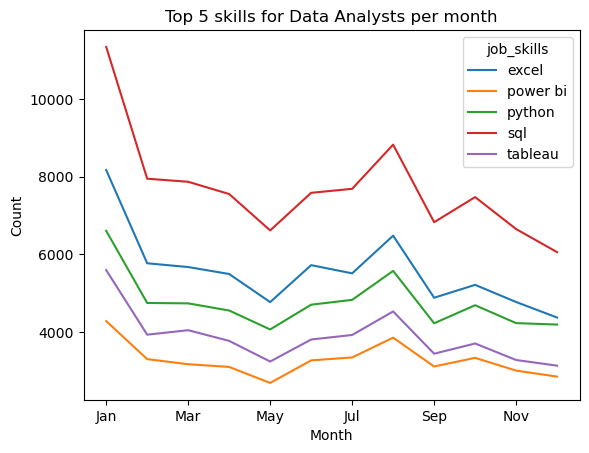

In [12]:
df_final.plot(kind= 'line')
plt.title(f"Top 5 skills for {job_title}s per month")
plt.xlabel('Month')
plt.ylabel('Count')